In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import ortho_group
import string

In [82]:
def line_factory(xmin, xmax, ymin, ymax):
    def line(v):
        if v[0] == 0:
            return ([v[0], v[0]], [ymin, ymax])
        else:
            m = v[1]/v[0]
            return ([xmin, xmax], [m*ymin, m*ymax])
    return line

In [224]:
v.shape

(3, 3)

(-1.25, 1.25)

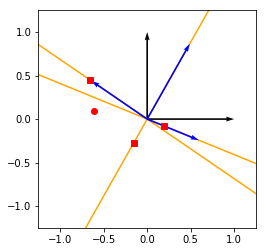

In [151]:
# np.random.seed(1)
# np.random.seed(6)
# np.random.seed(14)
np.random.seed(17)
x = np.random.uniform(-1.5, 1.5, size=9).reshape(3, 3)
_, __, vt = np.linalg.svd(x)
v = vt.T
xv = x @ v 

(xmin, xmax, ymin, ymax) = (-1.25, 1.25, -1.25, 1.25)
line = line_factory(xmin, xmax, ymin, ymax)
Lv0 = line(v[:,0])
Lv1 = line(v[:,1])
Lv2 = line(v[:,2])
plt.axes().set_aspect('equal')
plt.autoscale(False)
plt.plot(*Lv0, 'orange', zorder=1)
plt.plot(*Lv1, 'orange', zorder=1)
plt.plot(*Lv2, 'orange', zorder=1)
plt.plot(x[0,0], x[0,1], "ro")
plt.quiver([0, 0, 0], [0, 0, 0], v[0,:], v[1,:], angles='xy', scale_units='xy', scale=1, color="blue", zorder=3)
plt.quiver([0, 0], [0, 0], [1, 0], [0, 1], angles='xy', scale_units='xy', scale=1, color="black", zorder=2)
plt.plot([xv[0,0]*v[0,0]], [xv[0,0]*v[1, 0]], 'rs', zorder=4)
plt.plot([xv[0,1]*v[0,1]], [xv[0,1]*v[1, 1]], 'rs', zorder=4)
plt.plot([xv[0,2]*v[0,2]], [xv[0,2]*v[1, 2]], 'rs', zorder=4)
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)

In [49]:
[a, b, c] = xv[0, 0]* v[:,0] + xv[0, 1]* v[:,1] + xv[0, 2]* v[:,2]
print(x[0,:])
print(c)

[-0.29711436  1.25833496  0.94158916]
0.9415891607987181


In [34]:
v0 = v[:,0].reshape(3, 1)
p0 = v0 @ np.linalg.inv(v0.T @ v0) @ v0.T

In [84]:
Lv0

([-2, 2], [-1.2478959506957676, 1.2478959506957676])

In [74]:
def line(v, xmin, xmax, ymin, ymax):
    if v[0] == 0:
        return ([v[0], v[0]], [ymin, ymax])
    else:
        m = v[1]/v[0]
        return ([xmin, xmax], [m*ymin, m*ymax])

In [75]:
u = line(v[:,0], -2, 2, -2, 2)

In [291]:
names = ["symboling", "normalized losses", "make", "fuel type", "aspiration",
        "number of doors", "body style", "drive wheels", "engine location", "wheel base", "length",
        "width", "height", "curb weight", "engine type", "number of cylinders", "engine size", "fuel system", 
        "bore", "stroke", "compression ratio", "horsepower", "peak rpm", "city mpg", "highway mpg", "price"]

usecols = ["wheel base", "length",
        "width", "height", "curb weight", "number of cylinders", "engine size",
        "bore", "stroke", "compression ratio", "horsepower", "peak rpm", "city mpg", "highway mpg", "price"]

numbers = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}

In [301]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',
                names=names, usecols=usecols)

df['number of cylinders'] = df['number of cylinders'].apply(lambda n: numbers[n])

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

cars = df.copy()
good_cars = cars.loc[cars.isnull().any(axis=1) == False]
df.dropna(inplace=True)

df = (df-df.mean())/df.std()

In [210]:
# df.to_csv("cars_normalized.csv", index=False)

In [211]:
cars = pd.read_csv('cars_normalized.csv')

In [244]:
x = cars.values
u, s, vt = np.linalg.svd(x)
explained = [ np.sum(np.square(s[:k+1]))/np.sum(np.square(s)) for k in range(len(s))]
v = vt.T
xv = x @ v 
print(v.shape)

(15, 15)


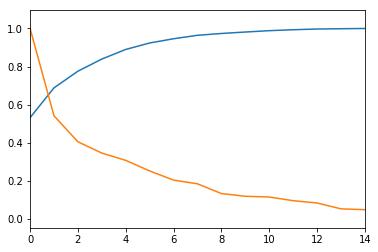

In [223]:
plt.plot(range(len(s)), explained, range(len(s)), s/np.max(s))
plt.margins(0, 0.1)

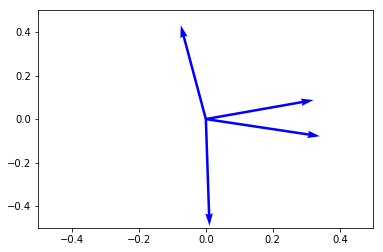

In [272]:
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.quiver([0 for i in range(4)], [0 for i in range(4)], ux, uy, angles='xy', scale_units='xy', scale=1, color="blue", zorder=3)


In [236]:
(v[:, :2]).shape

(15, 2)

In [271]:
[ux, uy] = v.T[:2, [4, 6, 9, 11]]

In [241]:
u

array([0.27243786, 0.31313278, 0.31255572, 0.09643922])

In [242]:
v

array([-0.31411018, -0.19095327, -0.14091391, -0.42212861])

In [256]:
print(v[:,0])
print(v[:,1])

[ 0.27243786  0.31313278  0.31255572  0.09643922  0.34090628  0.24682657
  0.32154223  0.24316566  0.04860502  0.01085369  0.29606855 -0.07491814
 -0.30004986 -0.30981588  0.31513351]
[-0.31411018 -0.19095327 -0.14091391 -0.42212861 -0.07879005  0.18539958
  0.08740689 -0.03782081 -0.10929635 -0.49116809  0.28829303  0.4313084
 -0.23499806 -0.18702407  0.06809854]


In [265]:
np.argsort(np.abs(v[:,0]))

array([ 9,  8, 11,  3,  7,  5,  0, 10, 12, 13,  2,  1, 14,  6,  4])

In [266]:
np.argsort(np.abs(v[:,1]))

array([ 7, 14,  4,  6,  8,  2,  5, 13,  1, 12, 10,  0,  3, 11,  9])

In [282]:
usecols[11]

'peak rpm'

In [283]:
df.sort_values(['curb weight', 'engine size'], axis=1)

KeyError: 'curb weight'

In [288]:
df.sort_values(['curb weight', 'engine size'])

,wheel base,length,width,height,curb weight,number of cylinders,engine size,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
18,-1.711733,-2.657562,-2.619553,-0.276012,-2.041105,-1.389298,-1.615548,-1.542617,-0.701361,-0.171087,-1.459524,0.001095,3.378277,3.244685,-1.005050
30,-2.005273,-2.377033,-0.931380,-1.277356,-1.612301,-0.407729,-0.867368,-1.542617,0.508389,-0.146469,-1.195461,-0.639559,3.690710,3.391112,-0.840211
31,-2.005273,-2.377033,-0.931380,-1.277356,-1.410287,-0.407729,-0.867368,-1.542617,0.508389,-0.244940,-0.720148,1.923058,0.878817,1.048271,-0.793539
32,-0.847420,-1.944218,-0.884487,-0.526348,-1.375983,-0.407729,-1.181121,-1.542617,-0.574019,-0.023381,-1.142649,0.855301,1.972331,1.633981,-0.974267
19,-0.716957,-1.471327,-1.072061,-0.776684,-1.305469,-0.407729,-0.915638,-1.101222,-0.446677,-0.146469,-0.878585,0.641749,1.972331,1.780409,-0.863050
21,-0.847420,-1.359115,-0.978274,-1.277356,-1.301657,-0.407729,-0.915638,-1.321920,-0.064651,-0.193243,-0.931398,0.855301,1.816114,1.487554,-0.952793
22,-0.847420,-1.359115,-0.978274,-1.277356,-1.301657,-0.407729,-0.915638,-1.321920,-0.064651,-0.195705,-0.931398,0.855301,0.878817,1.048271,-0.852872
89,-0.716957,-0.717907,-0.978274,0.266383,-1.276882,-0.407729,-0.746694,-0.659828,0.126363,-0.195705,-0.904992,0.214647,0.878817,0.901844,-0.961854
50,-0.945266,-1.214843,-0.790699,0.099493,-1.274976,-0.407729,-0.891503,-1.101222,-0.319335,-0.294176,-0.931398,-0.212456,0.722600,0.023278,-0.999589
51,-0.945266,-1.214843,-0.790699,0.099493,-1.255918,-0.407729,-0.891503,-1.101222,-0.319335,-0.294176,-0.931398,-0.212456,0.878817,1.048271,-0.887875
